## Exploratory Data Analysis

In [25]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [26]:
df = pd.read_csv('../data/AAPL.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...,...
2006,23-12-2019,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2007,24-12-2019,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2008,26-12-2019,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2009,27-12-2019,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Data Inspection

In [27]:
# Checking for Null Values
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [28]:
# Checking for Duplicate Rows
df['Date'].duplicated().sum()

0

In [29]:
# Statistical Description
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


In [30]:
# Checking for Rows Data Types
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Data Cleaning

In [31]:
# Converting Data Column to DateTime Format
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [32]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [33]:
# Setting Datetime as Index
dt= df.set_index('Date').rename_axis(None)
dt

,Open,High,Low,Close,Adj Close,Volume
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100
...,...,...,...,...,...,...
2019-12-23,280.529999,284.250000,280.369995,284.000000,282.054138,24643000
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.322266,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,287.923645,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,287.814392,36566500


### Visualizations

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Close Price')

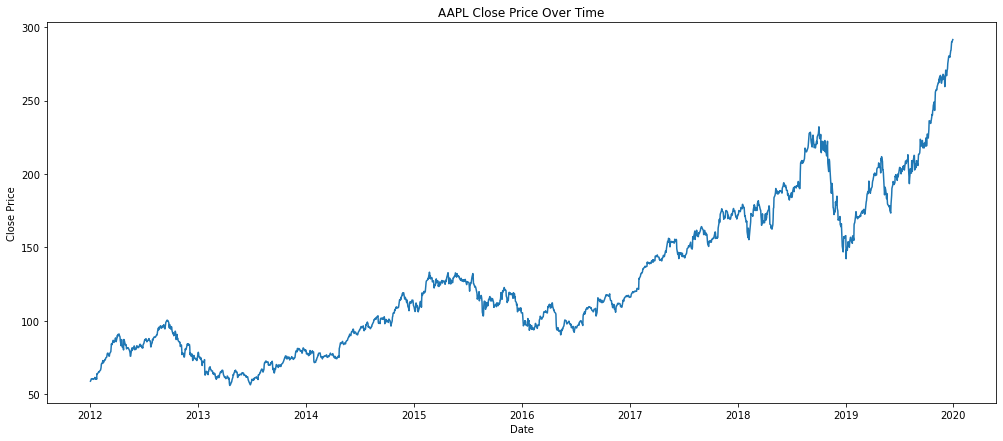

In [35]:
# Line Plot for Stock Prices based on Closing Price

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'])
plt.title('AAPL Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')


Stock has shown a gradual increase in the assest value over time.

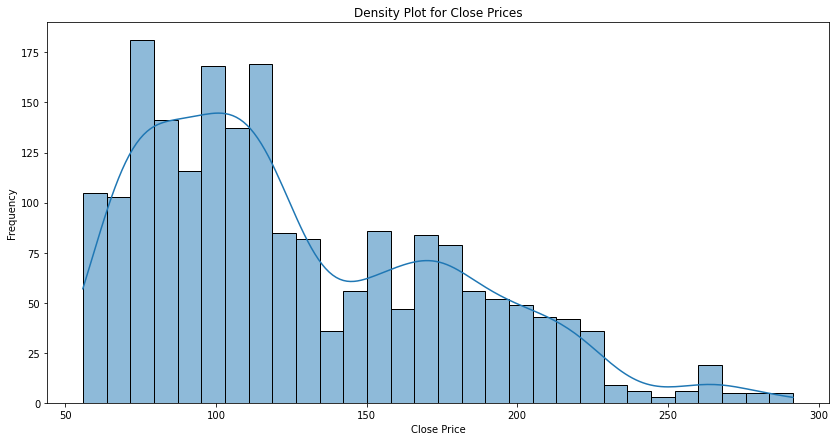

In [36]:
# Density Plots
plt.figure(figsize=(14,7))
sns.histplot(dt['Close'], kde=True, bins=30)
plt.title('Density Plot for Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

#### Observations for Density Plot

* The most common closing prices are in the 90 to 110 range.
* The distribution is right-skewed with a long tail towards higher prices.
* There are two primary peaks indicating frequent price ranges.
* There is significant variability in the closing prices over the time period.

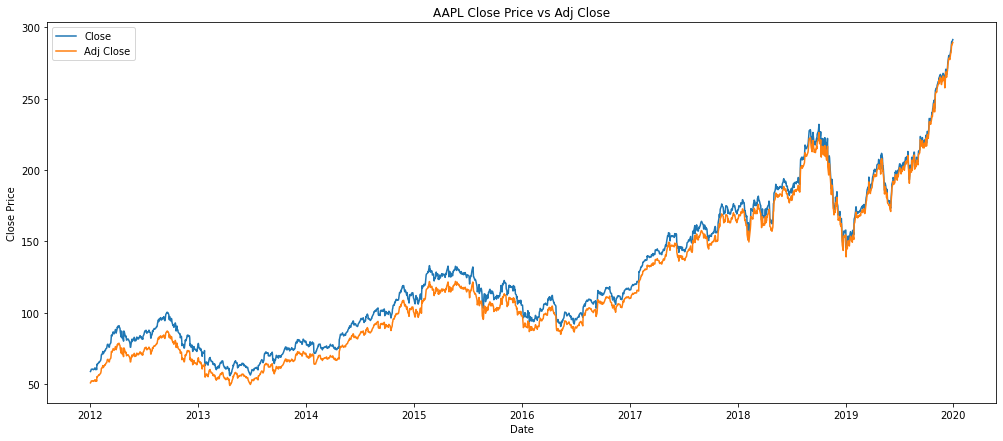

In [37]:
# Line Plot for Stock Prices (Closing Price vs Adjusted Close)

plt.figure(figsize=(17,7))
plt.plot(dt.index, dt['Close'], label = 'Close')
plt.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
plt.title('AAPL Close Price vs Adj Close')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#### Observations for Adjusted Close Prices
Adjusted Close Price represents the closing price of a stock that has been adjusted for all applicable splits and dividend distributions. This adjustment provides a more accurate representation of the stock's value over time.

* Importance of Adjustments when these is a Stock Split:

    When a compnay performs a stock split, the number of shares increases, but the price per share decreases proportionally. The Adjusted Close price accounts for these changes, allowing for a consistent comparision over time.

* Importance of Adjustments when Dividends are issued:

    Cash dividends paid by the company are also factored into the Adjusted Close price. This adjustment reflects the drop in stock price when dividends are paid, providing a true reflection of the investor's return.

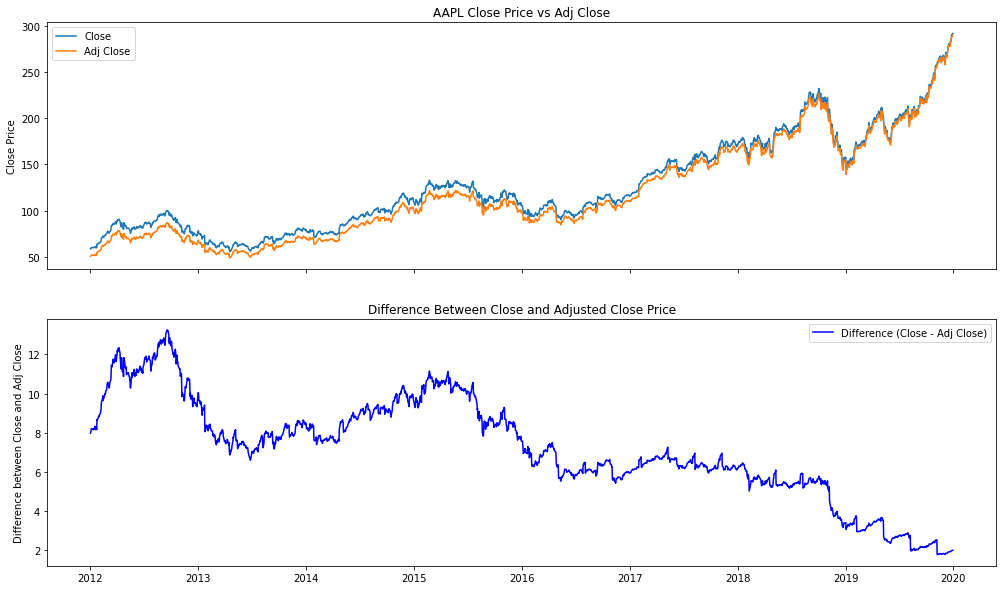

In [38]:
# Plot the difference and ratio
dt['Difference'] = dt['Close'] - dt['Adj Close']
 
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(17, 10), sharex=True)

# Plot for Close Price and Adj Close Price
ax1.plot(dt.index, dt['Close'], label = 'Close')
ax1.plot(dt.index, dt['Adj Close'], label = 'Adj Close')
ax1.set_title('AAPL Close Price vs Adj Close')
ax1.set_ylabel('Close Price')
ax1.legend()

# Plot the difference
ax2.plot(dt.index, dt['Difference'], label='Difference (Close - Adj Close)', color='blue')
ax2.set_title('Difference Between Close and Adjusted Close Price')
ax2.set_ylabel('Difference between Close and Adj Close')
ax2.legend()
plt.show()

#### Differences between Close and Adjusted Close

* The differneces vary over time, showing larger gaps during specific periods. These periods typically correspond to major corporate actions like stock splits or significant dividend payments. For Instance, the difference is higher around 2012-2013, which might correspond to a stock split or significant dividend distributions during that time.

* There is a noticeable trend where the difference decreases over time, especially from 2017 onwards. This could indicate fewer major corporate actions impacting the stock price in the latter years compared to earlier years.

* After significant events, the difference stabilizes for periods before showing another spike, reflecting the consistency in how corporate actions impact the stock price.

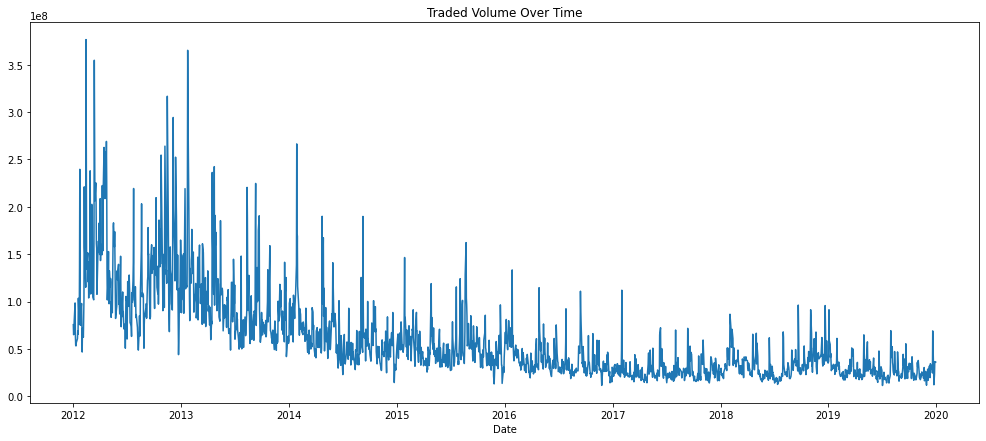

In [39]:
# Volumne Traded Over Time
plt.figure(figsize=(17,7))
plt.plot(dt.index, dt.Volume)
plt.title('Traded Volume Over Time')
plt.xlabel('Date')
plt.show()

#### Observations for Volume

* The early period (2012 - 2014) had high trading volumes and significant price adjustments, indicating a volatile period with frequent corporate actions.

* Post - 2014, the trading volume shows a decreasing trend, and the differences between Close and Adjusted Close price also stabilize, indicating fewer significant corporate actions.

* Periodic spikes in trading volume correspond to significant events affecting stock prices, which align with the significant adjustments observed in the difference plot.

#### Observations for Decomposition Plots

In [40]:
# Decomposing the time series
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(dt['Close'], model='additive', period=365)

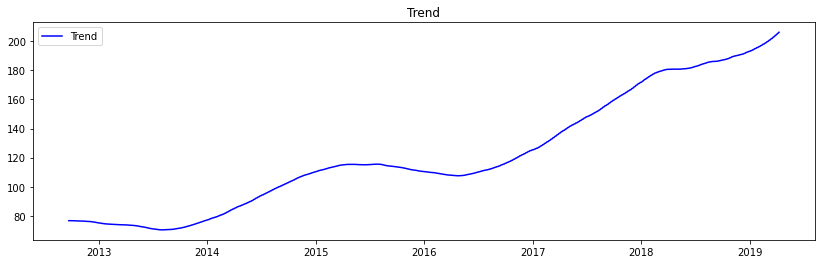

In [41]:
# Plotting Trend
plt.figure(figsize=(14,4))
plt.plot(result.trend, label='Trend', color='blue')
plt.title('Trend')
plt.legend()
plt.show()

##### 1. Trend:

* The trend component captures the long-term progression of the series. It shows the general direction in which the data is moving over a long period, ignoring short-term fluctuations and noise.

* The trend line is generally upward from 2012 to 2020, indicating a consistent long-term increase in the AAPL stock price. There are periods of acceleration, especially from 2017 onward, where the stock price increases at a faster rate.

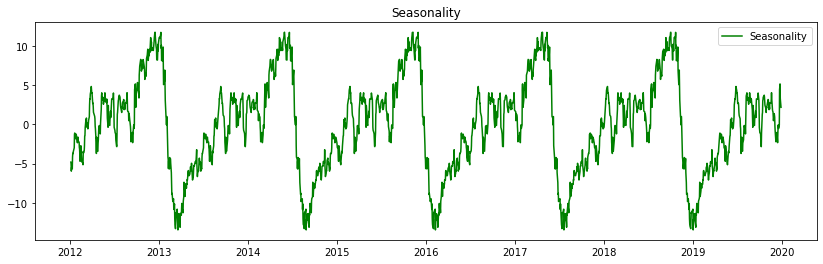

In [42]:
# Plotting Seasonal Component
plt.figure(figsize=(14,4))
plt.plot(result.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.legend()
plt.show()

##### 2. Seasonality:

* Seasonality refers to the repeated patterns or cycles observed at regular intervals due to seasonal factors. This component is consistent and predictable over the time period.

* The seasonal component shows a regular, recurring pattern on an annual basis. There are noticeable peaks and troughs each year, indicating that certain times of the year consistently experience higher or lower prices. This pattern repeats roughly every year, showing the impact of seasonal factors on the stock price.

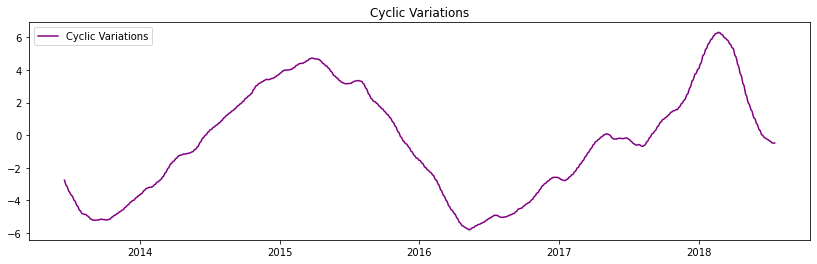

In [43]:
# Plotting Cyclic Component
cyclic = result.trend - result.trend.rolling(window = 365, center= True).mean()
plt.figure(figsize=(14,4))
plt.plot(cyclic, label='Cyclic Variations', color='purple')
plt.title('Cyclic Variations')
plt.legend()
plt.show()

##### 3. Cyclic Variations:

* Cyclic Variations capture fluctuations that occur at irregular intervals, often influenced by economic cycles, market conditions, or other external factors. Unlike seasonality, cyclic variations do not have a fixed period.

* The cyclic component shows longer-term fluctuations that are not as regular as seasonal effects. For instance, there is a noticeable cyclic peak around 2018 and a trough around 2015, indicating periods of economic or market cycles affecting the stock price.

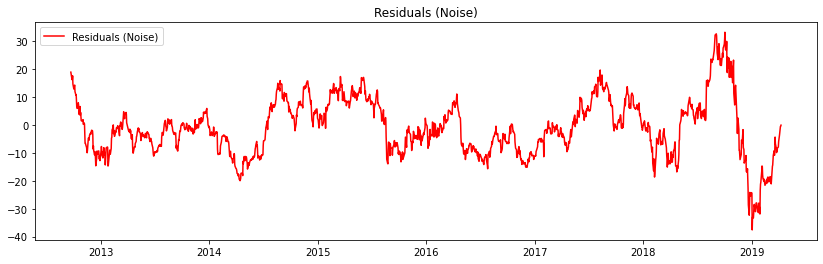

In [44]:
# Plotting Residuals
plt.figure(figsize=(14,4))
plt.plot(result.resid, label='Residuals (Noise)', color='red')
plt.title('Residuals (Noise)')
plt.legend()
plt.show()

##### 4. Residuals/Noise:

* The residual component captures the remaining variability in the data after removing the trend, seasonal, and cyclic components. It represents the irregular, random fluctuations in the series.

* The residuals show high-frequency variability that does not follow any predictable pattern. Periods with larger residuals indicate times of higher volatility or unexpected events impacting the stock price. For example, there is significant noise in the data around 2018 and again towards the end of 2019.

<Figure size 864x432 with 0 Axes>

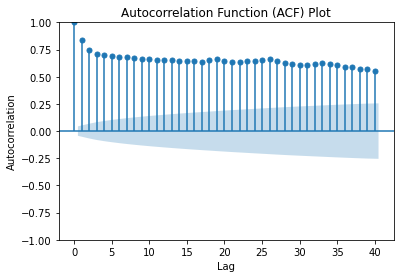

In [45]:
# Seasonality using Auto Correlation
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12,6))
plot_acf(dt['Volume'], lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF) Plot')
plt.show()

#### Observation for Seasonality using Autocorrelation

* Peaks at regular intervals in the ACF plot suggest the presence of seasonality.

* As there are no visible spikes at regular intervals, there is no seasonality in the data.